EMAIL-SPAM-DETECTION WITH MACHINE LEARNING

### Import Libraries

In [1]:
import pandas as pd
import nltk #(natural language tool-kit)
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sea

In [2]:
df=pd.read_csv("spam.csv",encoding='latin1' )
df

v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  
2           NaN        NaN  
3           NaN        NaN  
4           NaN        NaN  
...         ...        ...  
5567        NaN        NaN  
5568        NaN        NaN  
5569        NaN        NaN  
5570        NaN        NaN  
5571        NaN        NaN  

[5572 rows x 5 columns]

In [3]:
df.head()

v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [4]:
df.sample(10)

v1                                                 v2 Unnamed: 2  \
2172   ham   Yavnt tried yet and never played original either        NaN   
2127   ham  Tessy..pls do me a favor. Pls convey my birthd...        NaN   
4686   ham                                  Eatin my lunch...        NaN   
3936   ham  Yeah, in fact he just asked if we needed anyth...        NaN   
3570   ham                     But you dint in touch with me.        NaN   
1080   ham  You tell what happen dont behave like this to ...        NaN   
4901  spam  * FREE* POLYPHONIC RINGTONE Text SUPER to 8713...        NaN   
4252   ham  Juz now havent woke up so a bit blur blur... C...        NaN   
3990   ham                         I am on the way to ur home        NaN   
4562   ham  Come around  &lt;DECIMAL&gt; pm vikky..i'm ots...        NaN   

     Unnamed: 3 Unnamed: 4  
2172        NaN        NaN  
2127        NaN        NaN  
4686        NaN        NaN  
3936        NaN        NaN  
3570        NaN        NaN  
1080        NaN        NaN  
4901        NaN        NaN  
4252        NaN        NaN  
3990        NaN        NaN  
4562        NaN        NaN

In [5]:
df.shape

(5572, 5)

In [6]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

## DATA CLEANING

Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.

In [7]:

#Renaming the columns for better understanding

df.rename(columns={'v1':'Variety' , 'v2':'Data'}, inplace=True)

#Renaming columns permanently so "inplace=True"
df.head()

Variety                                               Data Unnamed: 2  \
0     ham  Go until jurong point, crazy.. Available only ...        NaN   
1     ham                      Ok lar... Joking wif u oni...        NaN   
2    spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3     ham  U dun say so early hor... U c already then say...        NaN   
4     ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

### Labelling in dataset

Variety values either showing 'ham' or "spam" , lets martk them with 0 and 1 respectively

In [8]:
encoder = LabelEncoder()
df['Variety'] = encoder.fit_transform(df['Variety']) #allotting 0,1
df.head()

Variety                                               Data Unnamed: 2  \
0        0  Go until jurong point, crazy.. Available only ...        NaN   
1        0                      Ok lar... Joking wif u oni...        NaN   
2        1  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3        0  U dun say so early hor... U c already then say...        NaN   
4        0  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Variety     5572 non-null   int32 
 1   Data        5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: int32(1), object(4)
memory usage: 196.0+ KB


In [10]:
#from above info we can see that last 3 columns Unnamed:2 , Unnamed: 3 , Unnamed: 4 has a good amount of
#null values , so drop those columns

df.drop(columns=['Unnamed: 2' , 'Unnamed: 3' , 'Unnamed: 4'],inplace = True)

#dropping columns permanently so "inplace=True"
df.head()

Variety                                               Data
0        0  Go until jurong point, crazy.. Available only ...
1        0                      Ok lar... Joking wif u oni...
2        1  Free entry in 2 a wkly comp to win FA Cup fina...
3        0  U dun say so early hor... U c already then say...
4        0  Nah I don't think he goes to usf, he lives aro...

In [11]:
#check duplicates
df.duplicated().sum()

403

In [12]:
#delete duplicates
df = df.drop_duplicates(keep='first')
df

Variety                                               Data
0           0  Go until jurong point, crazy.. Available only ...
1           0                      Ok lar... Joking wif u oni...
2           1  Free entry in 2 a wkly comp to win FA Cup fina...
3           0  U dun say so early hor... U c already then say...
4           0  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567        1  This is the 2nd time we have tried 2 contact u...
5568        0              Will Ì_ b going to esplanade fr home?
5569        0  Pity, * was in mood for that. So...any other s...
5570        0  The guy did some bitching but I acted like i'd...
5571        0                         Rofl. Its true to its name

[5169 rows x 2 columns]

In [13]:
df.isnull().sum()

Variety    0
Data       0
dtype: int64

In [14]:
df.sample(10)

Variety                                               Data
2392        0  Thanks da thangam, i feel very very happy dear...
543         0    4 oclock at mine. Just to bash out a flat plan.
1253        0  Mum say we wan to go then go... Then she can s...
2217        0  * Will have two more cartons off u and is very...
961         1  URGENT! We are trying to contact U. Todays dra...
2079        0                        I can take you at like noon
1930        0                Carry on not disturbing both of you
398         0  Good evening Sir, Al Salam Wahleykkum.sharing ...
1801        0                           I wanna watch that movie
1612        1  RT-KIng Pro Video Club>> Need help? info@ringt...

### After Data Cleaning

In [15]:
df.shape

(5169, 2)

## EDA

Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations.

### Count spam(1) and non-spam(0) mails

In [16]:
df['Variety'].value_counts()

0    4516
1     653
Name: Variety, dtype: int64

In [30]:

#For tokenize the words , need to dowload the 'punkt' module
# nltk.download('punkt')

### Words in each text

In [18]:

df['words'] = df['Data'].apply(lambda x:len(nltk.word_tokenize(x))) #word_tokenize is breaking according to words
df.sample(10)

C:\Users\nilay\AppData\Local\Temp\ipykernel_12768\2394586766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['words'] = df['Data'].apply(lambda x:len(nltk.word_tokenize(x))) #word_tokenize is breaking according to words


Variety                                               Data  words
4938        0  Tomarrow i want to got to court. At  &lt;DECIM...     26
2469        0                                     * Am on my way      5
2819        1  INTERFLORA - åÒIt's not too late to order Inte...     24
1415        0  Jay is snickering and tells me that x is total...     17
1107        0  From someone not to smoke when every time I've...     29
2642        0  They can try! They can get lost, in fact. Tee hee     14
3523        0  Yeah that'd pretty much be the best case scenario     10
4459        0  This is wishing you a great day. Moji told me ...     54
432         1  Congrats! Nokia 3650 video camera phone is you...     27
1812        0  \Getting tickets 4 walsall tue 6 th march. My ...     32

### Sentences in each mail

In [19]:
df['sentence'] = df['Data'].apply(lambda x:len(nltk.sent_tokenize(x))) #sent_tokenize is breaking according to words
df.sample(10)

C:\Users\nilay\AppData\Local\Temp\ipykernel_12768\2794721563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'] = df['Data'].apply(lambda x:len(nltk.sent_tokenize(x))) #sent_tokenize is breaking according to words


Variety                                               Data  words  \
3485        0                   Yeah, probably earlier than that      6   
3565        0  Its ok..come to my home it vl nice to meet and...     17   
1971        0                        Enjoy ur life. . Good night      6   
588         0                        Ya srsly better than yi tho      6   
1504        0                         Oh my God. I'm almost home      8   
2721        0     I'm working technical support :)voice process.     10   
4308        0  He dint tell anything. He is angry on me that ...     17   
3789        0  I love you !!! You know? Can you feel it? Does...     43   
5209        0  I know you are thinkin malaria. But relax, chi...     67   
3524        0  I not free today i haf 2 pick my parents up to...     13   

      sentence  
3485         1  
3565         1  
1971         1  
588          1  
1504         2  
2721         1  
4308         2  
3789         6  
5209         6  
3524         1

### Characters in each text

In [20]:
df['chars']= df['Data'].apply(len)
df.sample(10)

C:\Users\nilay\AppData\Local\Temp\ipykernel_12768\1945805562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['chars']= df['Data'].apply(len)


Variety                                               Data  words  \
5209        0  I know you are thinkin malaria. But relax, chi...     67   
2600        0     As usual..iam fine, happy &amp; doing well..:)     15   
4674        1  Hi babe its Chloe, how r u? I was smashed on s...     37   
1554        0                    Yeah we do totes. When u wanna?     10   
3434        0  \Hi darlin i cantdo anythingtomorrow as mypare...     21   
5028        1  I'd like to tell you my deepest darkest fantas...     26   
1299        0  Great to hear you are settling well. So what's...     15   
4593        0  I had a good time too. Its nice to do somethin...     25   
1296        0  Sure! I am driving but will reach my destinati...     12   
3202        0  Haha... Yup hopefully  we will lose a few kg b...     22   

      sentence  chars  
5209         6    329  
2600         1     46  
4674         5    160  
1554         2     31  
3434         3    105  
5028         3    126  
1299         2     64  
4593         3    106  
1296         2     54  
3202         2     97

### summary of spam mails

In [21]:
df[df['Variety'] == 1][['words','sentence','chars']].describe()

words    sentence       chars
count  653.000000  653.000000  653.000000
mean    27.667688    2.967841  137.891271
std      7.008418    1.483201   30.137753
min      2.000000    1.000000   13.000000
25%     25.000000    2.000000  132.000000
50%     29.000000    3.000000  149.000000
75%     32.000000    4.000000  157.000000
max     46.000000    8.000000  224.000000

### Statistics summary of Non-Spam mails

In [22]:
df[df['Variety'] == 0][['words','sentence','chars']].describe()

words     sentence        chars
count  4516.000000  4516.000000  4516.000000
mean     17.120903     1.799601    70.459256
std      13.493725     1.278465    56.358207
min       1.000000     1.000000     2.000000
25%       8.000000     1.000000    34.000000
50%      13.000000     1.000000    52.000000
75%      22.000000     2.000000    90.000000
max     220.000000    28.000000   910.000000

AS WE CAN SEE NON-SPAM MAILS HAVE LARGE NUMBER OF WORDS , CHARACTERS , SENTENCES IN COMPARE TO THE SPAM MAILS. SO THIS IS THE DIFFERENTIATING FACTOR

## HEAT MAP

C:\Users\nilay\AppData\Local\Temp\ipykernel_12768\3972786225.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sea.heatmap(df.corr(), annot=True, cmap="viridis").set(title='Heatmap of Correlated values \n')


[Text(0.5, 1.0, 'Heatmap of Correlated values \n')]

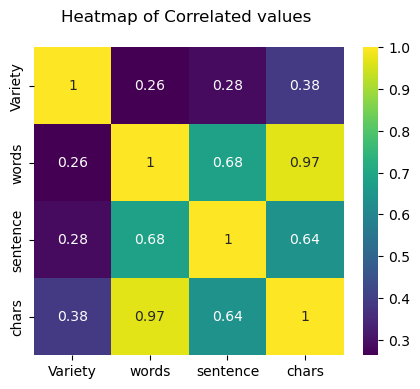

In [23]:
fig, ax = plt.subplots(figsize = (5, 4))
sea.heatmap(df.corr(), annot=True, cmap="viridis").set(title='Heatmap of Correlated values \n')


## GRAPHICAL REPRESENTATION OF THE MAILS

### FOR WORDS

<Figure size 800x500 with 0 Axes>

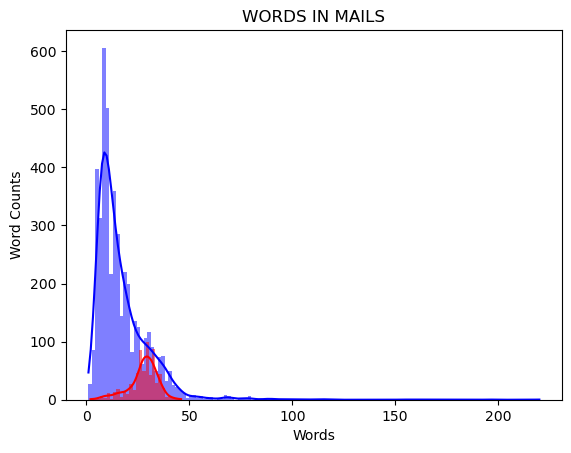

In [24]:
plt.figure(figsize=(8,5))
fig, ax = plt.subplots()
sea.histplot(df[df['Variety'] == 0]['words'], color="blue", kde=True, stat="count", linewidth=0,ax = ax)
sea.histplot(df[df['Variety'] == 1]['words'], color="red", kde=True, stat="count", linewidth=0 ,ax = ax)
ax.set_ylabel("Word Counts")
ax.set_xlabel( "Words")
ax.set_title( "WORDS IN MAILS")
plt.show()

### FOR CHARACTERS

<Figure size 800x500 with 0 Axes>

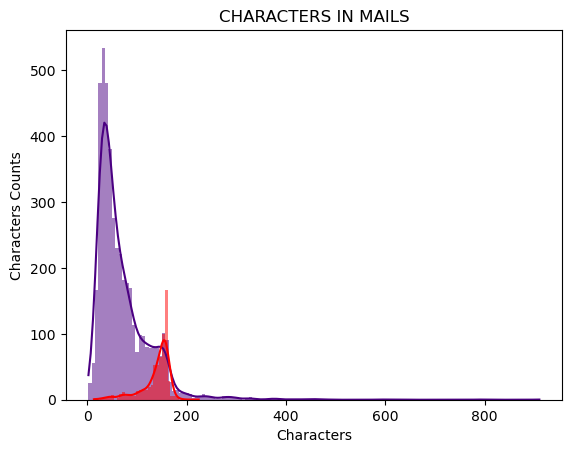

In [25]:

plt.figure(figsize=(8,5))
fig, ax = plt.subplots()
sea.histplot(df[df['Variety'] == 0]['chars'], color="indigo", kde=True, stat="count", linewidth=0,ax = ax)
sea.histplot(df[df['Variety'] == 1]['chars'], color="red", kde=True, stat="count", linewidth=0,ax = ax)
ax.set_ylabel("Characters Counts")
ax.set_xlabel( "Characters")
ax.set_title( "CHARACTERS IN MAILS")
plt.show()

### FOR SENTENCES

<Figure size 800x500 with 0 Axes>

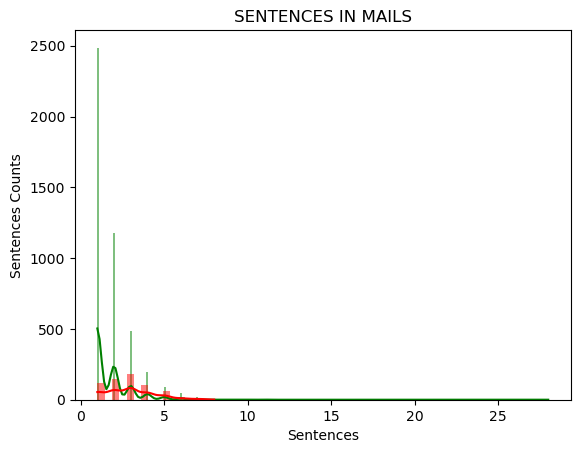

In [26]:
plt.figure(figsize=(8,5))
fig, ax = plt.subplots()
sea.histplot(df[df['Variety'] == 0]['sentence'], color="green", kde=True, stat="count", linewidth=0,ax = ax)
sea.histplot(df[df['Variety'] == 1]['sentence'], color="red", kde=True, stat="count", linewidth=0,ax = ax)
ax.set_ylabel("Sentences Counts")
ax.set_xlabel( "Sentences")
ax.set_title( "SENTENCES IN MAILS")
plt.show()

## Pairplot

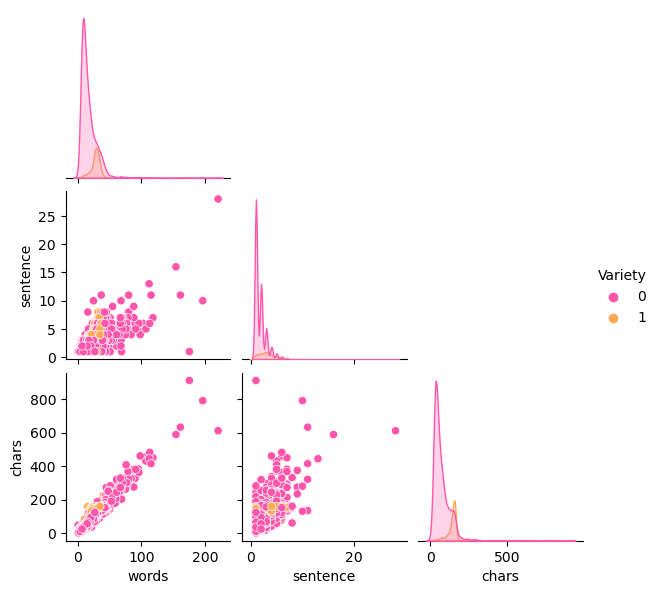

In [27]:
sea.pairplot(df,hue='Variety',corner=True,height=2,palette='spring');


## DATASET GAVING TOTAL OF SPAM AND NON-SPAM MAILS USING PIE CHART



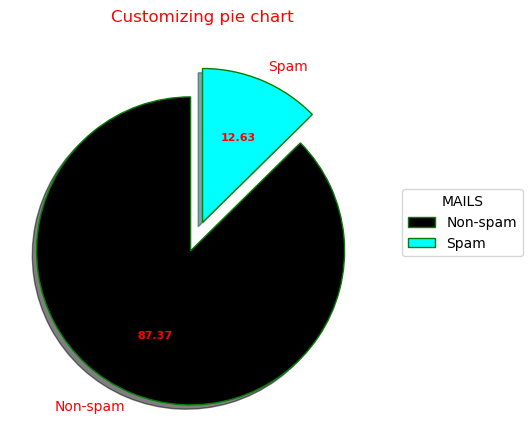

In [28]:
fig, ax = plt.subplots(figsize =(5, 5))
#labels
m=['Non-spam','Spam']
#title for chart
ax.set_title("Customizing pie chart",color="red")
# Creating color parameters
colors = ( "black", "cyan")
# Creating explode data
explode = (0.2, 0.0)
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
# Creating plot
wedges, texts, autotexts = ax.pie(df['Variety'].value_counts(),
                                  autopct = "%0.2f",
                                  explode = explode,
                                  labels = m,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="red"))
# Adding legend
ax.legend(wedges,m,
          title ="MAILS",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))

plt.setp(autotexts, size = 8, weight ="bold")

plt.show()
